In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import datasets
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm import tqdm
from func import *


# Hyperparameters
in_channel = 3
num_classes = 10

# TO DO
learning_rate = 0.001
batch_size = 64
num_epochs = 5

optimizer: dict
activation_func: dict
dropout_rate = 0.1
no_neurons = 100

# class with typical neural network - no convolutional layers
class NN_1_class(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN_1_class, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_step(self, data, optimizer, criterion):
        x, y = data

        optimizer.zero_grad()

        logits = self(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

    def test_step(self, data, criterion):
        x, y = data

        logits = self(x)
        loss = criterion(logits, y)
        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}


    
# https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79
class CNN_2_class(nn.Module):
    def __init__(self):
        super(CNN_2_class, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*5*5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 64*5*5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_step(self, data, optimizer, criterion):
        x, y = data

        optimizer.zero_grad()

        logits = self(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

    def test_step(self, data, criterion):
        x, y = data

        logits = self(x)
        loss = criterion(logits, y)
        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}
    
# https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


In [10]:
# Hyperparameters
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 5
optimizer = optim.Adam
activation_func = nn.ReLU()
dropout_rate = 0.1
no_neurons = 128
criterion = nn.CrossEntropyLoss()
kernel_size=3
stride=1
padding=1
number_of_filters=32
length_of_input0=32

def Conv2d_output_size(w, k, s, p):
    '''
    w - width of input image
    k - kernel size
    s - stride
    p - padding
    '''
    return (w - k + 2 * p) / s + 1

class CNN_3_class(nn.Module):
    def __init__(self, num_classes):
        super(CNN_3_class, self).__init__()
        self.conv1 = nn.Conv2d(3, number_of_filters, kernel_size, stride, padding)
        self.pool1 = nn.MaxPool2d(2)
        length_of_input1 = Conv2d_output_size(length_of_input0, kernel_size, stride, padding)/2
        self.conv2 = nn.Conv2d(number_of_filters, number_of_filters, kernel_size, stride, padding)
        self.pool2 = nn.MaxPool2d(2)
        length_of_input2 = Conv2d_output_size(length_of_input1, kernel_size, stride, padding)/2
        self.fc1 = nn.Linear(int(number_of_filters*length_of_input2*length_of_input2), no_neurons)
        self.fc2 = nn.Linear(no_neurons, num_classes)
    
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        length_of_input1 = Conv2d_output_size(length_of_input0, kernel_size, stride, padding)/2
        x = self.pool2(torch.relu(self.conv2(x)))
        length_of_input2 = Conv2d_output_size(length_of_input1, kernel_size, stride, padding)/2
        x = x.view(-1, int(number_of_filters*length_of_input2*length_of_input2))
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def train_step(self, data, optimizer, criterion):
        x, y = data

        optimizer.zero_grad()

        logits = self(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

    def test_step(self, data, criterion):
        x, y = data

        logits = self(x)
        loss = criterion(logits, y)
        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

In [13]:

# class CNN_3_class(nn.Module):
#     def __init__(self):
#         super(CNN_3_class, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(64*8*8, 64*8*8)
#         self.fc2 = nn.Linear(64*8*8, 10)
#         # self.conv2 = nn.Conv2d(32, 64, 3)
#         # self.pool1 = nn.MaxPool2d(2)
#         # self.conv3 = nn.Conv2d(64, 128, 3)
#         # self.pool2 = nn.MaxPool2d(2)
#         # self.fc1 = nn.Linear(128*5*5, 128)
#         # self.fc2 = nn.Linear(128, 10)

#     def forward(self, x):
#         x = self.pool1(torch.relu(self.conv1(x)))
#         x = self.pool2(torch.relu(self.conv2(x)))
#         x = x.view(-1, 64*8*8)
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

#     def train_step(self, data, optimizer, criterion):
#         x, y = data

#         optimizer.zero_grad()

#         logits = self(x)
#         loss = criterion(logits, y)
#         loss.backward()
#         optimizer.step()

#         accuracy = (logits.argmax(dim=1) == y).float().mean()

#         return {'loss': loss, 'accuracy': accuracy}

#     def test_step(self, data, criterion):
#         x, y = data

#         logits = self(x)
#         loss = criterion(logits, y)
#         accuracy = (logits.argmax(dim=1) == y).float().mean()

#         return {'loss': loss, 'accuracy': accuracy}


In [14]:
# alexnet nn trained on cifar10
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
class CNN_4_class(nn.Module):
    def __init__(self):
        super(CNN_4_class, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.fc1 = nn.Linear(256*6*6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool3(torch.relu(self.conv5(x)))
        x = x.view(-1, 256*6*6)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def train_step(self, data, optimizer, criterion):
        x, y = data

        optimizer.zero_grad()

        logits = self(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

    def test_step(self, data, criterion):
        x, y = data

        logits = self(x)
        loss = criterion(logits, y)
        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

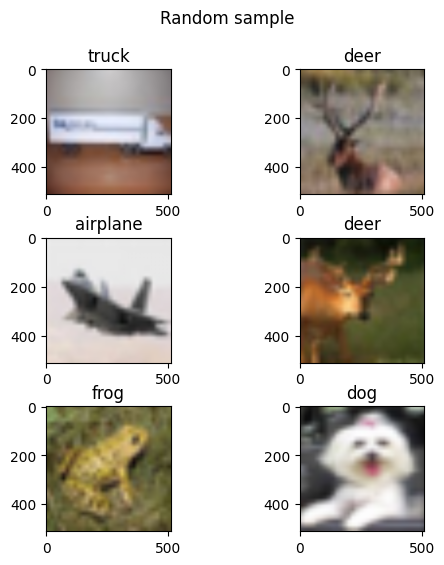

In [6]:
cifar_train = datasets.cifar_train
cifar_train.display_sample_images(sample_size=6, resize=512)

In [9]:

test_loader = datasets.val_loader
train_loader = datasets.train_loader
augmentation1_loader = datasets.augmentation1_loader
augmentation2_loader = datasets.augmentation2_loader

In [12]:



# # Load the MNIST dataset
# batch_size = 64
# train_dataset = MNIST(root='.', train=True, transform=ToTensor(), download=True)
# test_dataset = MNIST(root='.', train=False, transform=ToTensor(), download=True)

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create model, criterion, and optimizer
model = CNN_3_class(10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train the model
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    train_losses = []
    train_accuracies = []
    for data in tqdm(train_loader):
        results = model.train_step(data, optimizer, criterion)
        train_losses.append(results['loss'].item())
        train_accuracies.append(results['accuracy'].item())

    # Calculate average training loss and accuracy for the epoch
    avg_train_loss = sum(train_losses) / len(train_losses)
    avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)
    print(f'Train loss: {avg_train_loss:.4f}, Train accuracy: {avg_train_accuracy:.4f}')

    # Test the model
    val_losses = []
    val_accuracies = []
    with torch.no_grad():
        for data in tqdm(test_loader):
            results = model.test_step(data, criterion)
            val_losses.append(results['loss'].item())
            val_accuracies.append(results['accuracy'].item())

    # Calculate average test loss and accuracy for the epoch
    avg_validation_loss = sum(val_losses) / len(val_losses)
    avg_validation_accuracy = sum(val_accuracies) / len(val_accuracies)
    print(f'Validation loss: {avg_validation_loss:.4f}, Validation accuracy: {avg_validation_accuracy:.4f}')


Epoch 1/5


 19%|█▉        | 243/1250 [00:16<01:05, 15.33it/s]

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm import tqdm
from dataset import *

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*5*5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 64*5*5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_step(self, data, optimizer, criterion):
        x, y = data

        optimizer.zero_grad()

        logits = self(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}

    def test_step(self, data, criterion):
        x, y = data

        logits = self(x)
        loss = criterion(logits, y)
        accuracy = (logits.argmax(dim=1) == y).float().mean()

        return {'loss': loss, 'accuracy': accuracy}



In [3]:
batch_size=32

In [4]:
# definicja modelu, kryterium oraz optymalizatora
model = MyCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# przypisanie modelu do GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

# trening modelu
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    running_accuracy = 0.0
    
    # przejście przez wszystkie mini-batche w DataLoader
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zerowanie gradientu, wykonanie forward pass, obliczenie błędu, wykonanie backward pass i aktualizacja wag
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # obliczenie metryk
        running_loss += loss.item()
        running_accuracy += (outputs.argmax(dim=1) == labels).float().mean().item()
        
        # wyświetlenie metryk co 100 mini-batchy
        if i % 100 == 99:
            print(f'Epoch {epoch+1}, mini-batch {i+1}, loss: {running_loss/100:.3f}, accuracy: {running_accuracy/100:.3f}')
            running_loss = 0.0
            running_accuracy = 0.0

print('Finished training')

RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[32, 3, 32, 32] to have 1 channels, but got 3 channels instead